# Using BeautifulSoup
Let's get the data about Kings XI Punjab's performance in the IPL

We need to import the following libraries.

In [8]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

%matplotlib inline

Define some placeholder variables.

In [9]:
URL = 'https://en.wikipedia.org/wiki/20{:02d}_Indian_Premier_League'
SEASON = 'IPL-{:02d}'

Generating urls - this is where we will get our data from.

In [10]:
for i in range(8,20):
    print(SEASON.format(i - 7), URL.format(i))

IPL-01 https://en.wikipedia.org/wiki/2008_Indian_Premier_League
IPL-02 https://en.wikipedia.org/wiki/2009_Indian_Premier_League
IPL-03 https://en.wikipedia.org/wiki/2010_Indian_Premier_League
IPL-04 https://en.wikipedia.org/wiki/2011_Indian_Premier_League
IPL-05 https://en.wikipedia.org/wiki/2012_Indian_Premier_League
IPL-06 https://en.wikipedia.org/wiki/2013_Indian_Premier_League
IPL-07 https://en.wikipedia.org/wiki/2014_Indian_Premier_League
IPL-08 https://en.wikipedia.org/wiki/2015_Indian_Premier_League
IPL-09 https://en.wikipedia.org/wiki/2016_Indian_Premier_League
IPL-10 https://en.wikipedia.org/wiki/2017_Indian_Premier_League
IPL-11 https://en.wikipedia.org/wiki/2018_Indian_Premier_League
IPL-12 https://en.wikipedia.org/wiki/2019_Indian_Premier_League


In [11]:
df = pd.DataFrame()

for i in range(8,20):
    
    url = URL.format(i)
    season = SEASON.format(i - 7)
    
    response = requests.get(url)
    soup = BeautifulSoup(response.content,'html.parser')
    
    trs = soup.find_all('tr')
    for tr in trs:
        
        tags = tr.find_all('a')
        
        if len(tags) > 0:
            tds = tr.find_all('td')
            try:
                name = tds[0].text.strip()
                played = int(tds[1].text)
                wins = int(tds[2].text)
                
                if len(name) < 10:
                    continue
                name = name.split('(')[0]
                name = name.strip()
                
                row = [name, season, played, wins]
                df = df.append([row])
#                 print(row)
            except:
                continue

In [12]:
df.columns = ['Team','Season','Played','Wins']
df = df.set_index(['Season','Team'])

df

Played  Wins
Season Team                                     
IPL-01 Rajasthan Royals                 14    11
       Kings XI Punjab                  14    10
       Chennai Super Kings              14     8
       Delhi Daredevils                 14     7
       Mumbai Indians                   14     7
...                                    ...   ...
IPL-12 Sunrisers Hyderabad              14     6
       Kolkata Knight Riders            14     6
       Kings XI Punjab                  14     6
       Rajasthan Royals                 14     5
       Royal Challengers Bangalore      14     5

[82 rows x 2 columns]

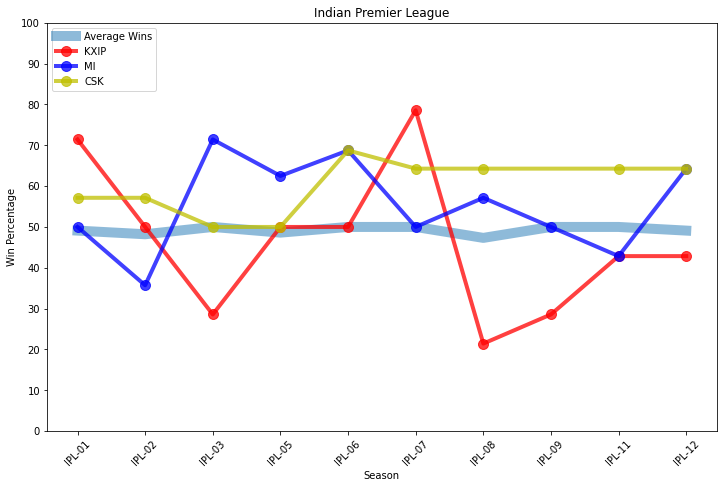

In [14]:
mean_df = pd.DataFrame()

seasons = list(df.index.levels[0])
teams = list(set(df.index.levels[1]))

for i in seasons:    
    mean_df = mean_df.append(pd.Series(df.loc[i].mean(),name=i))
mean_df['Win %'] = mean_df['Wins'] / mean_df['Played'] * 100

team_dfs = {}
for team in teams:
    team_dfs[team] = pd.DataFrame()
    for i in seasons:    
        try:
            team_dfs[team] = team_dfs[team].append(pd.Series(df.loc[i].loc[team],name=i))
        except:
            pass
    team_dfs[team]['Win %'] = team_dfs[team]['Wins'] / team_dfs[team]['Played'] * 100
        



plt.figure(figsize=(12,9))
plt.plot(mean_df['Win %'],'-',label='Average Wins',alpha=0.5,linewidth=10)
# for team in teams:
#     plt.plot(team_dfs[team]['Win %'],label=team)

plt.plot(team_dfs['Kings XI Punjab']['Win %'],'-or',label='KXIP',linewidth=4,markersize=10,alpha=0.75)
plt.plot(team_dfs['Mumbai Indians']['Win %'],'-ob',label='MI',linewidth=4,markersize=10,alpha=0.75)
plt.plot(team_dfs['Chennai Super Kings']['Win %'],'-oy',label='CSK',linewidth=4,markersize=10,alpha=0.75)


x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)
plt.subplots_adjust(bottom=0.25)

plt.legend(loc=2)

ax = plt.gca()
ax.set_yticks(np.arange(0,110,10))

ax.set_ylabel('Win Percentage')
ax.set_xlabel('Season')
ax.set_title('Indian Premier League');